<a href="https://colab.research.google.com/github/rommeljpadilla/sales-predictions/blob/main/Copy_of_Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data/sales_predictions.csv')
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [ ]:
# Find number of rows and columns
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


8523 rows and 12 columns

In [ ]:
# Find datatypes of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#checking for duplicate values
print(df.duplicated().sum())
df[df.duplicated()]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


There are no duplicate values

In [ ]:
#Finding missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

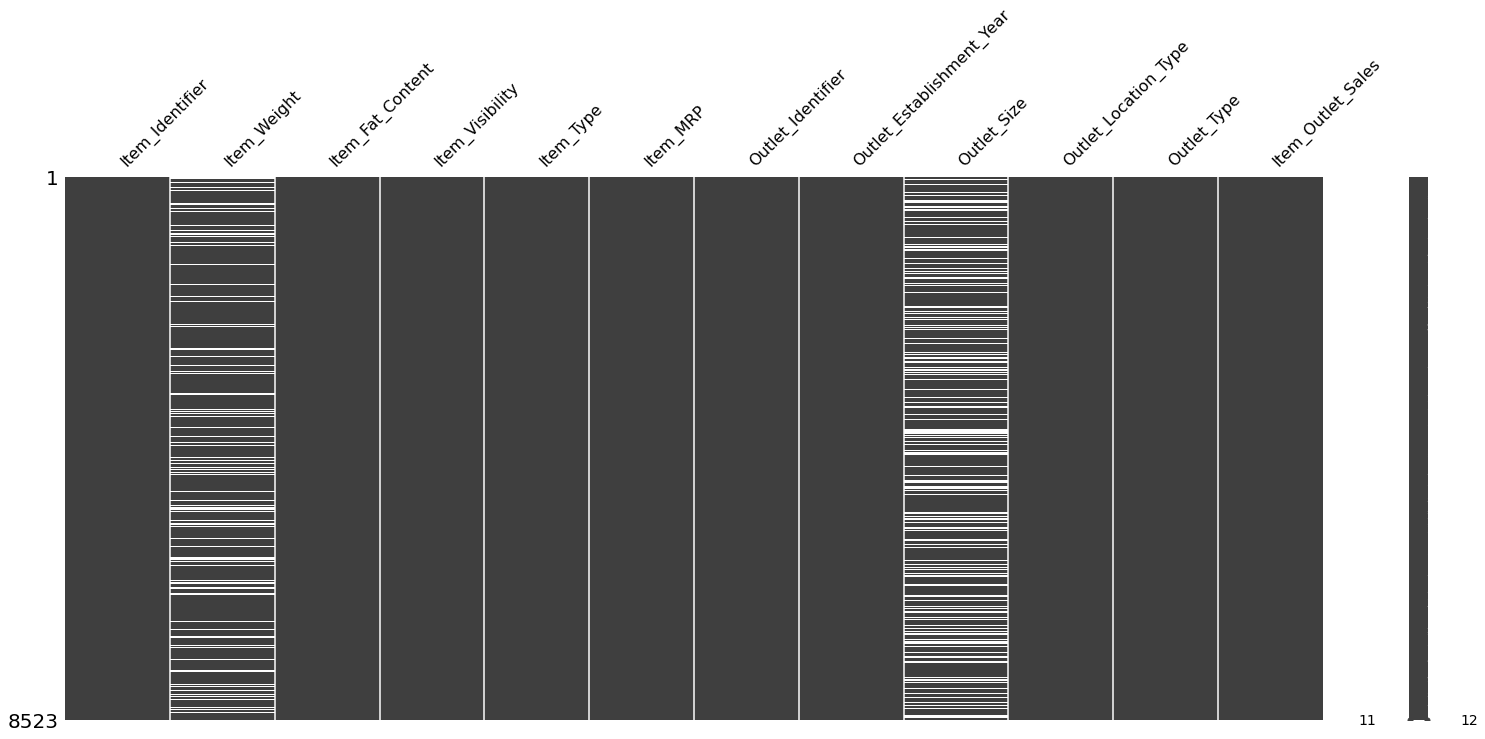

In [ ]:
import missingno
missingno.matrix(df)

We are missing values in both Item_weight and Outlet_Size. Both are important since weight/size is important considering space of a location. We will not drop all missing values. We will only drop the values if the row is missing both values since we can not guess on weight/size.

In [ ]:
df_clean = df.dropna(subset=['Item_Weight','Outlet_Size'], how='all')

In [ ]:
df_clean.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There no no missing values in both columns
df_clean is equal to df

In [ ]:
df_clean['Item_Weight'].fillna(0,inplace = True)
df_clean['Outlet_Size'].fillna("No value given",inplace = True)
df_clean.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#Finding Inconsistent values

data_types = df_clean.dtypes
column = data_types[data_types =='object'].index
column

for col in column:
  print(f' ---{col}---')
  print(df_clean[col].value_counts())
  print("\n\n\n")
  

 ---Item_Identifier---
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64




 ---Item_Fat_Content---
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64




 ---Item_Type---
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64




 ---Outlet_Identifier---
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018

We need to address the following:

*   Low Fat, low fat, LF
*   Regular, reg





In [ ]:
df_clean['Item_Fat_Content'] =df_clean['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_clean['Item_Fat_Content'] =df_clean['Item_Fat_Content'].replace('LF', 'Low Fat')
df_clean['Item_Fat_Content'] =df_clean['Item_Fat_Content'].replace('reg', 'Regular')


In [ ]:
# Doublechecking inconsistencies
data_types = df_clean.dtypes
column = data_types[data_types =='object'].index
column

for col in column:
  print(f' ---{col}---')
  print(df_clean[col].value_counts())
  print("\n\n\n")
  

 ---Item_Identifier---
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64




 ---Item_Fat_Content---
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64




 ---Item_Type---
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64




 ---Outlet_Identifier---
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    52

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [ ]:
#checking data types
df_clean.info()


num_column = data_types[data_types =='float'].index
num_column



<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [ ]:
#using a for loop in order to find the min,max,mean of num_column
for col in num_column:
  print(f' ---{col}---')
  print(f'{df_clean[col].min()} is the min')
  print(f'{df_clean[col].max()} is the max')
  print(f'{df_clean[col].mean()} is the mean')
  print("\n")
  

 ---Item_Weight---
0.0 is the min
21.35 is the max
10.650589581133575 is the mean


 ---Item_Visibility---
0.0 is the min
0.328390948 is the max
0.06613202877895127 is the mean


 ---Item_MRP---
31.29 is the min
266.8884 is the max
140.9927819781768 is the mean


 ---Item_Outlet_Sales---
33.29 is the min
13086.9648 is the max
2181.2889135750365 is the mean




In [ ]:
#Adding imports to the beginning of file

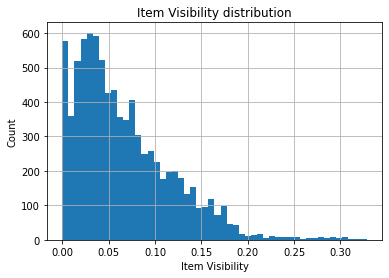

In [ ]:
#Creating a Histogram to get visual data
df_clean['Item_Visibility'].hist(bins='auto')
plt.xlabel('Item Visibility')
plt.ylabel('Count')
plt.title('Item Visibility distribution');


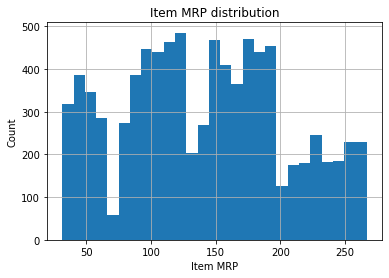

In [ ]:
#Creating a Histogram to get visual data
df_clean['Item_MRP'].hist(bins='auto')
plt.xlabel('Item MRP')
plt.ylabel('Count')
plt.title('Item MRP distribution');

In [ ]:
#summary of statistics
df_clean['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

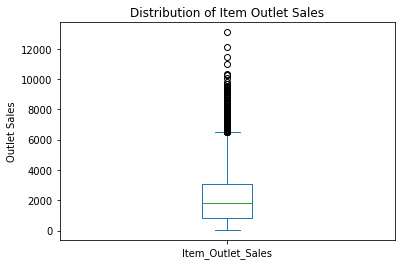

In [ ]:
df_clean['Item_Outlet_Sales'].plot(kind='box')
plt.title('Distribution of Item Outlet Sales')
plt.ylabel('Outlet Sales');

#With this boxplot, we can visually see the outliers

In [ ]:
df_clean.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.077522,0.022859,0.520561,-0.053222
Item_Visibility,-0.077522,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.022859,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.520561,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.053222,-0.128625,0.567574,-0.049135,1.000000


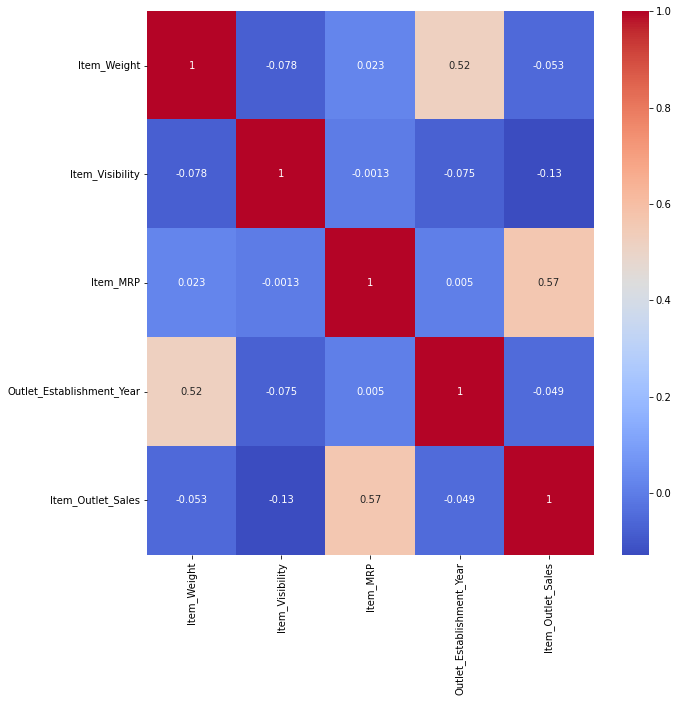

In [ ]:
corr=df_clean.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm');

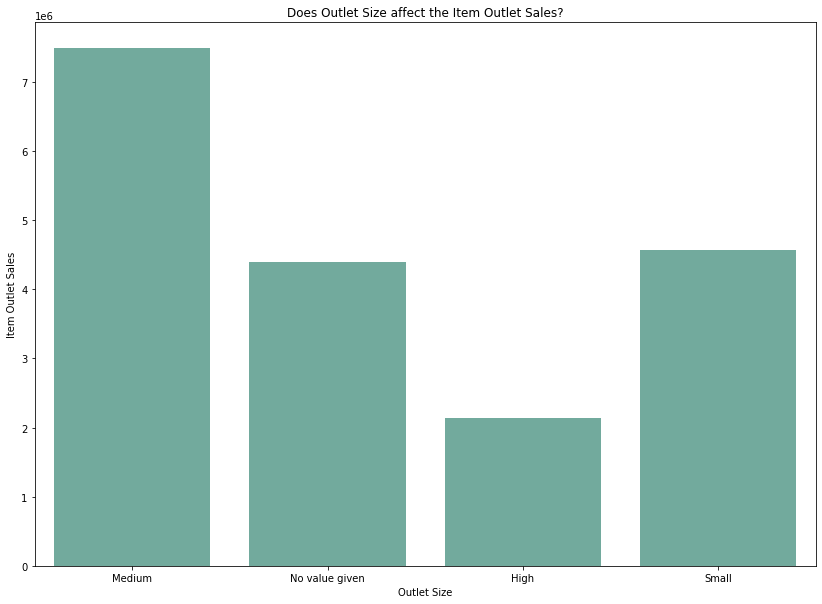

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 10))

# plot a bar chart
sns.barplot(
    y="Item_Outlet_Sales", 
    x="Outlet_Size", 
    data=df_clean, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2').set(
        Title='Does Outlet Size affect the Item Outlet Sales?',
        xlabel ='Outlet Size',
        ylabel='Item Outlet Sales');

#Based on the bar graph, items sell better on medium sized outlets. The smaller size is doing better than the bigger ones.

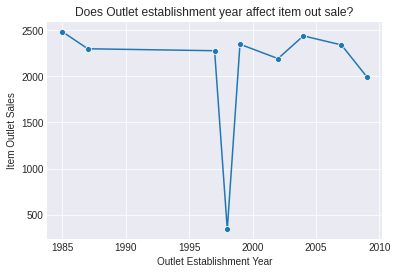

In [ ]:
ax = sns.lineplot(data=df_clean,x='Outlet_Establishment_Year',y="Item_Outlet_Sales",ci=None,marker='o');
ax.set_xlabel('Outlet Establishment Year');
ax.set_ylabel('Item Outlet Sales');
ax.set_title('Does Outlet establishment year affect item out sale?');

#Based on the lineplot, establishment year does not affect the sales of items.However, there is a drop for outlets established in 1998. However, this can be due to other circumstances
